In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_transaction.csv')

In [24]:
df_id = pd.read_csv('train_identity.csv')

In [25]:
df = pd.merge(df, df_id, how='left', on='TransactionID')

In [76]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,is_mobile,is_sketchy_device,is_sketchy_browser,is_protonmail,is_elsewise_sketchy_email,is_match,is_M4M2,is_M3,is_M2,is_M9
0,2987000,0,86400,68.5,W,13926,0.0,150.0,discover,142.0,...,0,0,0,0,False,0,1,1,1,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0,0,0,0,False,0,0,0,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0,0,0,0,True,0,0,1,1,0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,0,0,0,0,False,0,0,0,0,0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,1,0,0,0,False,0,0,0,0,0


In [77]:
df.assign(isna=(df['DeviceType']==0)).groupby('isna').isFraud.mean()

isna
False    0.079618
True     0.021017
Name: isFraud, dtype: float64

In [47]:
df.assign(isna=pd.isna(df['card1'])).groupby('isna').isFraud.mean()

isna
False    0.03499
Name: isFraud, dtype: float64

In [48]:
df.assign(isna=pd.isna(df['card3'])).groupby('isna').isFraud.mean()

isna
False    0.035017
True     0.024920
Name: isFraud, dtype: float64

In [49]:
df.assign(isna=pd.isna(df['card5'])).groupby('isna').isFraud.mean()

isna
False    0.034886
True     0.049307
Name: isFraud, dtype: float64

In [4]:
import seaborn as sns

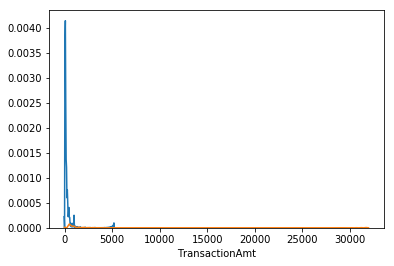

In [7]:
sns.distplot(df[df['isFraud']==1]['TransactionAmt'], hist=False)
sns.distplot(df[df['isFraud']==0]['TransactionAmt'], hist=False)

In [11]:
df.groupby('isFraud').TransactionAmt.mean()

isFraud
0    134.511665
1    149.244779
Name: TransactionAmt, dtype: float64

In [12]:
df.groupby('ProductCD').isFraud.mean()

ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64

In [27]:
df.groupby('DeviceType').isFraud.mean()

DeviceType
desktop    0.065215
mobile     0.101662
Name: isFraud, dtype: float64

In [45]:
df.groupby('id_34').isFraud.agg([np.mean, len])

,mean,len
id_34,,
match_status:-1,0.000000,3
match_status:0,0.050602,415
match_status:1,0.063651,17376
match_status:2,0.039293,60011


In [35]:
sketchy_devices = list(df.groupby('DeviceInfo').isFraud.agg([np.mean, len]).query('len>10').query('mean>.5').index)

In [40]:
sketchy_browser = list(df.groupby('id_31').isFraud.agg([np.mean, len]).query('len>10').query('mean>.15').index)

In [43]:
df.groupby('P_emaildomain').isFraud.agg([np.mean, len]).query('len>10').sort_values('mean', ascending=False)

,mean,len
P_emaildomain,,
protonmail.com,0.407895,76
mail.com,0.189624,559
outlook.es,0.130137,438
aim.com,0.126984,315
outlook.com,0.094584,5096
hotmail.es,0.065574,305
live.com.mx,0.054740,749
hotmail.com,0.052950,45250
gmail.com,0.043542,228355


In [15]:
df.iloc[:, 0:20].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0


In [50]:
df.assign(isna=pd.isna(df['dist1'])).groupby('isna').isFraud.mean()

isna
False    0.019956
True     0.045158
Name: isFraud, dtype: float64

In [52]:
df.assign(isna=pd.isna(df['dist2'])).groupby('isna').isFraud.agg([np.mean, len])

,mean,len
isna,,
False,0.099158,37627
True,0.030623,552913


In [53]:
df.assign(isna=pd.isna(df['M1'])).groupby('isna').isFraud.agg([np.mean, len])

,mean,len
isna,,
False,0.019853,319440
True,0.052826,271100


In [56]:
df.groupby('M1').isFraud.agg([np.mean, len])

,mean,len
M1,,
F,0.000000,25
T,0.019855,319415


In [57]:
df.groupby('M2').isFraud.agg([np.mean, len])

,mean,len
M2,,
F,0.034852,33972
T,0.018069,285468


In [58]:
df.groupby('M3').isFraud.agg([np.mean, len])

,mean,len
M3,,
F,0.030262,67709
T,0.017054,251731


In [59]:
df.groupby('M4').isFraud.agg([np.mean, len])

,mean,len
M4,,
M0,0.036649,196405
M1,0.027051,52826
M2,0.113739,59865


In [60]:
df.groupby('M5').isFraud.agg([np.mean, len])

,mean,len
M5,,
F,0.026523,132491
T,0.037697,107567


In [61]:
df.groupby('M6').isFraud.agg([np.mean, len])

,mean,len
M6,,
F,0.023686,227856
T,0.017044,193324


In [62]:
df.groupby('M7').isFraud.agg([np.mean, len])

,mean,len
M7,,
F,0.019345,211374
T,0.022127,32901


In [63]:
df.groupby('M8').isFraud.agg([np.mean, len])

,mean,len
M8,,
F,0.021726,155251
T,0.016218,89037


In [64]:
df.groupby('M9').isFraud.agg([np.mean, len])

,mean,len
M9,,
F,0.030001,38632
T,0.017787,205656


In [23]:
df.groupby(['dist2']).isFraud.agg([np.mean, len]).query('len>200').sort_values('mean', ascending=False)

,mean,len
dist2,,
17.0,0.276265,257
150.0,0.237209,215
199.0,0.193370,362
0.0,0.153453,3519
9.0,0.148248,742
1.0,0.139738,1374
11.0,0.102804,214
10.0,0.101124,356
15.0,0.100372,269


In [79]:
#Dealing with NA
df.fillna(0, inplace=True)
#Variable Creation
df['has_r'] = (pd.notna(df['R_emaildomain'])).astype(int)
df['different_r'] = (df['has_r']) * (df.P_emaildomain == df.R_emaildomain).astype(int)
df['is_discover'] = (df.card4=='discover').astype(int)
df['is_credit'] = (df.card6=='credit').astype(int)
df['is_sketchy_addr2'] = (df.addr2.isin([0,60,96]))
df['is_na_M1'] = (df['M1']==0).astype(int)
df['is_na_M2'] = (df['M2']==0).astype(int)
df['is_na_M3'] = (df['M3']==0).astype(int)
df['is_na_M5'] = (df['M5']==0).astype(int)
df['is_na_M6'] = (df['M6']==0).astype(int)
df['is_na_M7'] = (df['M7']==0).astype(int)
df['is_na_M8'] = (df['M8']==0).astype(int)
df['is_na_M9'] = (df['M9']==0).astype(int)
df['is_big_NA'] = df['is_na_M1']*df['is_na_M2']*df['is_na_M3']*df['is_na_M5']*df['is_na_M6']*df['is_na_M7']*df['is_na_M8']*df['is_na_M9']
df['is_C'] = (df.ProductCD=='C').astype(int)
df['is_S'] = (df.ProductCD=='S').astype(int)
df['is_H'] = (df.ProductCD=='H').astype(int)
df['is_mobile'] = (df.DeviceType=='mobile').astype(int)
df['is_sketchy_device'] = (df.DeviceInfo.isin(sketchy_devices)).astype(int)
df['is_sketchy_browser'] = (df.id_31.isin(sketchy_browser)).astype(int)
df['is_protonmail'] = (df.P_emaildomain=='protonmail.com').astype(int)
df['is_elsewise_sketchy_email'] = (df.P_emaildomain.isin(['mail.com', 'outlook.es', 'aim.com', 'outlook.com']))
df['is_match'] = (df.id_34=='match_status:1').astype(int)
df['is_M4M2'] = (df['M4']=='M2').astype(int)
df['is_M3'] = (df['M3']=='T').astype(int)
df['is_M2'] = (df['M2']=='T').astype(int)
df['is_M9'] = (df['M9']=='T').astype(int)
df['is_no_info'] = (df.DeviceType==0).astype(int)


In [80]:
#Column Selection
def colSelect(cols):
    output = []
    for col in cols:
        if col in ['isFraud', 'DeviceType', 'DeviceInfo']:
            output.append(False)
        elif col[0]=='C':
            output.append(True)
        elif col[0]=='V':
            output.append(True)
        elif col[0]=='D':
            output.append(True)
        elif col in ['has_r', 'different_r', 'dist1', 'dist2', 'card1', 'card2', 'card3', 'card5', 'TransactionAmt']:
            output.append(True)
        elif col[0:2]=='is':
            output.append(True)
        else:
            output.append(False)
    return(output)

In [81]:
cols = df.columns[colSelect(df.columns)]

In [68]:
from xgboost import XGBClassifier

In [82]:
xgb1 = XGBClassifier(n_estimators=300, max_depth=5, n_jobs=4,verbosity=3,  )

In [ ]:
xgb1.fit(df[cols], df['isFraud'])

[17:37:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


KeyboardInterrupt: 

[17:37:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


KeyboardInterrupt: 

[17:37:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


KeyboardInterrupt: 

[17:38:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


In [11]:
xgb1.predict_proba(df[cols])[0:5, 1]

array([0.15712702, 0.02852733, 0.01353451, 0.03463782, 0.00555718],
      dtype=float32)

In [12]:
df['preds'] = xgb1.predict_proba(df[cols])[:, 1]

In [13]:
from sklearn.metrics import auc, roc_curve

In [14]:
fpr, tpr, thresholds= roc_curve(df['isFraud'], df['preds'])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

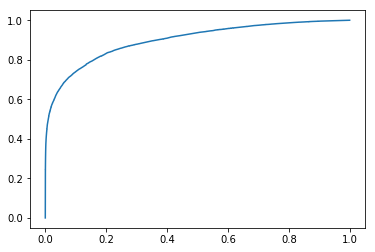

In [16]:
plt.plot(fpr, tpr)

In [17]:
auc(fpr, tpr)

0.8984449699832157

In [18]:
test = pd.read_csv('test_transaction.csv')

In [19]:
test.fillna(0, inplace=True)
#Variable Creation
test['has_r'] = (pd.notna(test['R_emaildomain'])).astype(int)
test['different_r'] = (test['has_r']) * (test.P_emaildomain == test.R_emaildomain).astype(int)
test['is_discover'] = (test.card4=='discover').astype(int)
test['is_credit'] = (test.card6=='credit').astype(int)
test['is_sketchy_addr2'] = (test.addr2.isin([0,60,96]))
test['is_na_M1'] = (test['M1']==0).astype(int)
test['is_na_M2'] = (test['M2']==0).astype(int)
test['is_na_M3'] = (test['M3']==0).astype(int)
test['is_na_M5'] = (test['M5']==0).astype(int)
test['is_na_M6'] = (test['M6']==0).astype(int)
test['is_na_M7'] = (test['M7']==0).astype(int)
test['is_na_M8'] = (test['M8']==0).astype(int)
test['is_na_M9'] = (test['M9']==0).astype(int)
test['is_big_NA'] = test['is_na_M1']*test['is_na_M2']*test['is_na_M3']*test['is_na_M5']*test['is_na_M6']*test['is_na_M7']*test['is_na_M8']*test['is_na_M9']

In [20]:
test['preds'] = xgb1.predict_proba(test[cols])[:, 1]

In [21]:
submission_df = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds']})

In [22]:
submission_df.to_csv('submission_2.csv', index=False)